In [85]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
          'width': 1150,
          'height': 1024,
})

{'width': 1150, 'height': 1024, 'scroll': True}

# Project Name : Langauage Detection Model with NLP(Natural Language Processing)

* Project Idea: Build a Machine Learning Model that detect language in given text.

* Data sources: https://oscar-corpus.com/ (OSCAR)

* Data Size total : 24 GB
* Used Data Size : 7.11 GB
* Data Store : Downloaded to Loacal Drive

**Possible Use Case** : 

**Text classification**

* Next Word Prediction

* spell check system


Name : Shardendu Jha

Big Data Analytics Specialisation Studies

In [56]:
# data load and read as csv

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

English = pd.read_csv("./language_data/lang_data/english.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["English"])
Arbic = pd.read_csv("./language_data/lang_data/arbic.gz","utf-8", engine='python',error_bad_lines=False,header=None,names=["Arbic"])
Thai = pd.read_csv("./language_data/lang_data/thai.gz","utf-8", engine='python',error_bad_lines=False,header=None,names=["Thai"])


# since colab RAM is not sufficient and session has been crashing over and over so i have excluded some of the data

# German = pd.read_csv("/content/drive/MyDrive/lang_data/german.gz","utf-8", engine='python',error_bad_lines=False,header=None,names=["German"])
# Hindi = pd.read_csv("/content/drive/MyDrive/lang_data/hindi.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["Hindi"])
# Spanish = pd.read_csv("/content/drive/MyDrive/lang_data/spanish.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["Spanish"])
# Hindi = pd.read_csv("/content/drive/MyDrive/lang_data/hindi.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["Hindi"])
# Nepali = pd.read_csv("/content/drive/MyDrive/lang_data/nepali.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["Nepali"])
# Thai = pd.read_csv("/content/drive/MyDrive/lang_data/thai.gz","utf-8", engine='python',error_bad_lines=False,header=None,names=["Thai"]))
# Finnish = pd.read_csv("/content/drive/MyDrive/lang_data/finnish.gz","utf-8",engine='python', error_bad_lines=False,header=None,names=["Finnish"])
# French = pd.read_csv("/content/drive/MyDrive/lang_data/french.gz","utf-8", engine='python', error_bad_lines=False,header=None,names=["French"])


Skipping line 360630: Expected 1 fields in line 360630, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 560890: Expected 1 fields in line 560890, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 656092: Expected 1 fields in line 656092, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 708471: Expected 1 fields in line 708471, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1294945: Expected 1 fields in line 1294945, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1570906: Expected 1 fields in line 1570906, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1959553: Expected 1 fields in line 1959553, saw 2. Error could possibl

# Text Pre-Processing

* **Tokenization**
* **Stop words Removel**
* **Lower case conversion**
* **Removing numric or digits**
* **Removing Punctuations/Special Characters**
* **Removing characters(for foreign languages)**
* **Removing Emojis**
* **Removing URL**
* **Removing HTML tag**
* **Normalization**
* **Stemming & lemmatization**

In [57]:
# check how big is the data
import sys
size_e = sys.getsizeof(English)
print("English",English.shape,"Size in bytes", size_e,"2.96 GB") # data size : 2.96 GB
size_a = sys.getsizeof(Arbic)
print("Arbic",Arbic.shape,"Size in bytes", size_a,"2.46 GB") # data size: 2.46 GB
size_th = sys.getsizeof(Thai)
print("Thai", Thai.shape, "Size in bytes", size_th,"1.69 GB") # data size is : 1.69 GB


English (6310974, 1) Size in bytes 2961266986 2.96 GB
Arbic (3529075, 1) Size in bytes 2466743306 2.46 GB
Thai (2745919, 1) Size in bytes 1691251444 1.69 GB


In [58]:
English.head()

,English
0,01/30/2016 It seems the pagination html hasn't...
1,1. Clicking ▼&► to (un)fold the tree menu may ...
2,"03/06/2017 If you speak a different language, ..."
3,01/30/2017 Partners wanted: Because I'm too bu...
4,08/13/2016 Because this site of music videos w...


In [59]:
Arbic.head()

,Arbic
0,مرحبا بك عزيز الزائر نتمنى لك أوقاتاً سعيدة مع...
1,"أهلا وسهلا بك زائرنا الكريم, أنت لم تقم بتسجيل..."
2,نرحب بكل الزائرين ... ونتمى لكم قضاء وقت ممتع ...
3,يسعدنا تسجيلكم معنا ومشاركتنا .... وشعارنا دوم...
4,[ltr]اجهزه الحضور والانصراف الذكيه التى تعمل ب...


In [60]:
Thai.head()

,Thai
0,ประกาศจังหวัดตาก เรื่อง เจตจำนงสุจริตในการบริห...
1,-- ส่วนราชการ -- สำนักงานจังหวัดตาก สนง.โยธาธิ...
2,ช่อง3 | ช่อง5 | ช่อง7 | ช่อง9 | ช่อง11 | ยูบีซ...
3,เว็บไซต์ถวายพระพรออนไลน์สมเด็จพระเทพฯ 5 รอบ 2 ...
4,กรุงเทพธุรกิจ | ข่าวสด | ฐานเศรษฐกิจ | เดลินิว...


In [61]:
# select limites row of the data

english = English[:300000]
arbic = Arbic[:300000]
thai = Thai[:300000]

In [62]:
# check if there is any NaN value

print(english.isnull().sum())
print("\n")
print(arbic.isnull().sum())

print("\n")
print(thai.isnull().sum())


English    0
dtype: int64


Arbic    0
dtype: int64


Thai    0
dtype: int64


In [63]:
import sys
size_e = sys.getsizeof(english)
print("English",english.shape,"Size in bytes", size_e,"1.44 GB")
size_a = sys.getsizeof(arbic)
print("Arbic",arbic.shape,"Size in bytes", size_a,"1.21 GB")
size_th = sys.getsizeof(thai)
print("Thai", thai.shape, "Size in bytes", size_th,"1.80 GB")


English (300000, 1) Size in bytes 144987251 1.44 GB
Arbic (300000, 1) Size in bytes 218670066 1.21 GB
Thai (300000, 1) Size in bytes 180740286 1.80 GB


In [64]:
# data pre-processing
# create translated table for removing all the unwanted char
import string

for char in string.punctuation:
    print(char, end=" ")

translate_table_string = dict((ord(char),None) for char in string.punctuation)

for char in string.digits:
    print(char, end=" ")

translate_table_digits = dict((ord(char),None) for char in string.digits)

for char in string.ascii_letters:
    print(char, end=" ")
    
translate_table_letters = dict((ord(char),None) for char in string.ascii_letters)


! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 0 1 2 3 4 5 6 7 8 9 a b c d e f g h i j k l m n o p q r s t u v w x y z A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

In [65]:
# delete all the emojis and symbols
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


english['English'] = english['English'].apply(remove_emojis)
arbic['Arbic'] = arbic['Arbic'].apply(remove_emojis)
thai['Thai'] = thai['Thai'].apply(remove_emojis)


In [66]:
# remove  all the url regex
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

english['English'] = english['English'].apply(remove_URL)
arbic['Arbic'] = arbic['Arbic'].apply(remove_URL)
thai['Thai'] = thai['Thai'].apply(remove_URL)


In [67]:
# remove all the html tag using regex
def remove_html(headline_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',headline_text)

english['English'] = english['English'].apply(remove_html)
arbic['Arbic'] = arbic['Arbic'].apply(remove_html)
thai['Thai'] = thai['Thai'].apply(remove_html)


In [68]:
# implement translated table with every individual language text and store them in separate list
import re
data_english=[]
lang_english=[]

for i, line in english.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower() # lowering text
        line = re.sub(r"\d+", "", line) # remove all the digit
        line = line.translate(translate_table_string) # remove all punctuation
        # line = line.translate(translate_table_letters)     # the corpus is itself english alphabet so if we iremove alphabet then all the lines will be ignored.
        line = " ".join(line.split()) # remove duplicated spaces
    if line != '': # select only rows which has text
        
        data_english.append(line)
        lang_english.append("English")
        
data_arbic=[]
lang_arbic=[]

for i, line in arbic.iterrows():
    line = line['Arbic']
    if len(line) !=0:
        line = line.lower() # lowering text
        line = re.sub(r"\d+", "", line) # remove all the digit
        line = line.translate(translate_table_string) # remove all punctuation
        line = line.translate(translate_table_letters) # Removing characters(for foreign languages)
        line = " ".join(line.split()) # remove duplicated spaces
    if line != '': # select only rows which has text
        data_arbic.append(line)
        lang_arbic.append("Arbic")
        

data_thai=[]
lang_thai=[]

for i, line in thai.iterrows():
    line = line['Thai']
    if len(line) !=0:
        line = line.lower()# lowering text
        line = re.sub(r"\d+", "", line) # remove all the digit
        line = line.translate(translate_table_string) # remove all punctuation
        line = line.translate(translate_table_letters) # Removing characters(for foreign languages)
        line = " ".join(line.split()) # remove duplicated spaces
    if line != '': # select only rows which has text
        data_thai.append(line)
        lang_thai.append("Thai")
              
      

In [69]:
# cleaned data
print(data_english[0])
print(data_arbic[4])
print(data_thai[2])

it seems the pagination html hasnt been working properly on this site since the total posts exceeded a certain number if you know how to solve this problem please kindly let me know
اجهزه الحضور والانصراف الذكيه التى تعمل بالبصمه والكارت او بصمه الوجه وتقوم بتحديد مواعيد حضور وانصراف وغياب واجازات واذونات الموظفين تصدر التقارير على ملف اكسل كما يمكن توصيلهاا بالانترنت لمراقبه الجهاز من اى مكان فالعالم توجد لدينا ماركات متعدده للاستفسار
ช่อง ช่อง ช่อง ช่อง ช่อง ยูบีซี ไอทีวี เนชั่น


In [70]:
# merged all the language list into pandas dataframe
df = pd.DataFrame({"Text":data_english+data_arbic+data_thai,
                   "Language":lang_english+lang_arbic+lang_thai})
print(df.shape)
df.head()

(899132, 2)


,Text,Language
0,it seems the pagination html hasnt been workin...,English
1,clicking to unfold the tree menu may facilitat...,English
2,if you speak a different language please consi...,English
3,partners wanted because im too busy with the h...,English
4,because this site of music videos was original...,English


In [71]:
df.isnull().values.any()

False

In [72]:
# spliting Data into train and test sets(80:20)
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,0],df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(719305,)
(179827,)
(719305,)
(179827,)


# Vectorization

* **Bag-of-Words(Count Vectorizer)**


* **TF-IDF(Term Frequency-Inverse Documet Frequency)**


* **Word2Vec**

# Various types Classification Algorithms

* **Logistic Regression**



* **Naive Bayes Classifier**


* **K-nearest Neighbors**


* **Decision Tree**


* **Support Vetors Machines # In our case we are going to use Support Vetor Machines**


In [73]:
# Vectorizer and model fitting Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction
from sklearn import pipeline
import sklearn.svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')

classifier = sklearn.svm.LinearSVC(C=0.0005,verbose=1)
pipe_svm = pipeline.Pipeline([('vectorizer', vectorizer),('clf',classifier)])

pipe_svm.fit(X_train, y_train)


# pipe_lr = pipeline.Pipeline([
#                              ('Vectorizer', vectorizer),
#                              ('clf', linear_model.LogisticRegression())
# ])

# pipe_lr.fit(X_train, y_train)

[LibLinear]

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=0.0005, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
       

In [74]:
# model prediction 
from sklearn import metrics
y_predicted = pipe_svm.predict(X_test)

acc = (metrics.accuracy_score(y_test, y_predicted))*100
print(acc,'%')

99.90546469662509 %


In [75]:
# model is not overfitting

print("Train Accuracy:",pipe_svm.score(X_train, y_train))
print("Test Accuracy:",pipe_svm.score(X_test, y_test))

Train Accuracy: 0.999113032719083
Test Accuracy: 0.9990546469662509


In [76]:
# model evaluation
matrix = metrics.confusion_matrix(y_test, y_predicted)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[60039     0    40]
 [    9 59763   121]
 [    0     0 59855]]


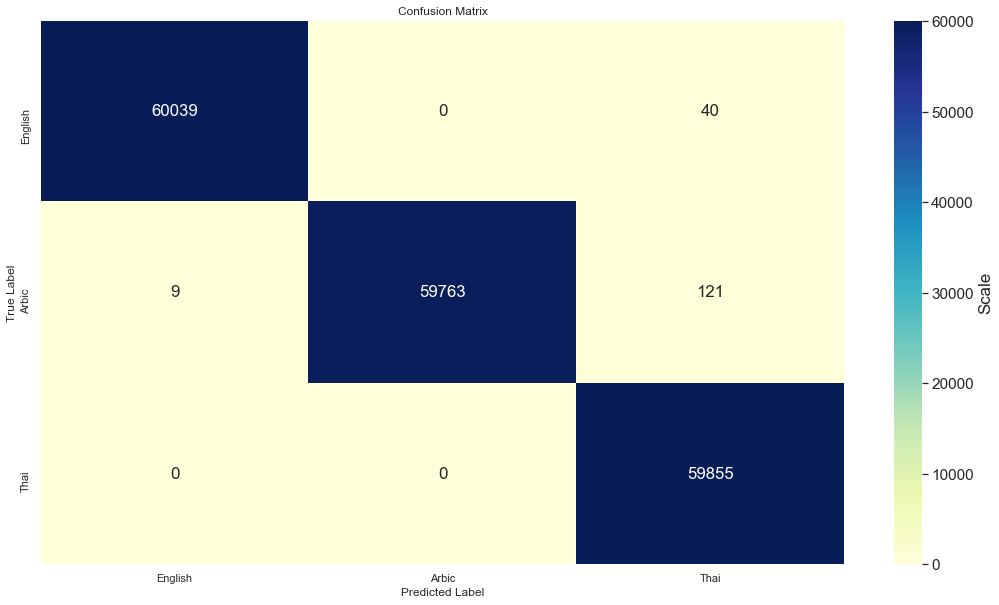

In [77]:
import seaborn
import matplotlib.pyplot as plt
 
# function for heatmap chart 
def plot_confusion_matrix(data, labels):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(18, 10))

    plt.title("Confusion Matrix")

    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'},fmt='g')

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel="True Label", xlabel="Predicted Label")


    

    
# define labels
labels = ["English","Arbic","Thai"]
 
# create confusion matrix
plot_confusion_matrix(matrix, labels)

In [78]:
# model saving
import pickle
svFile = open('SVModel.pckl', 'wb')
pickle.dump(pipe_svm, svFile)
svFile.close()

In [79]:
# model loading
global svLangDetectionModel
svLangDetectionFile = open('SVModel.pckl', 'rb')
svLangDetectionModel = pickle.load(svLangDetectionFile)
svLangDetectionFile.close()

In [80]:
def lang_detect(text):
    import numpy as np
    import string
    import re 
    import pickle
    translate_table_string = dict((ord(char),None) for char in string.punctuation)
    translate_table_digits = dict((ord(char),None) for char in string.digits)

    global svLangDetectionModel
    svLangDetectionFile = open('SVModel.pckl', 'rb')
    svLangDetectionModel = pickle.load(svLangDetectionFile)
    svLangDetectionFile.close()

    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(translate_table_digits)
    text = text.translate(translate_table_string)
    text = " ".join(text.split())

    prediction = svLangDetectionModel.predict([text])
   
    return prediction[0]


In [81]:
# preddiction

lang_detect("A good presentation slide can make sharing the output of complex analysis easy and used for concise  communication to customers and shareholders")


'English'

In [82]:
lang_detect("يمكن لشريحة العرض التقديمي الجيدة أن تجعل مشاركة مخرجات التحليل المعقد أمرًا سهلاً وتستخدم للتواصل المختصر مع العملاء والمساهمين")

'Arbic'

In [83]:
lang_detect("สไลด์การนำเสนอที่ดีสามารถทำให้การแบ่งปันผลลัพธ์ของการวิเคราะห์ที่ซับซ้อนเป็นเรื่องง่ายและใช้สำหรับการสื่อสารที่กระชับกับลูกค้าและผู้ถือหุ้น")

'Thai'

In [84]:
lang_detect("today, we have a final prasentation")

'English'

In [ ]:
Thank You!